#**OBJETIVO**



---


• Você deve investigar o dataset fornecido e concluir as tarefas de levantamento de
dados abaixo. Todas as tarefas devem ser respondidas através de um código
Python que imprima as informações solicitadas. Você deve incluir explicações sobre
os métodos usados para resolver cada problema.



---



**Dataset**



* cpf_cnpj: Identificação do comensal
* vinculo_comensal: Condição de isenção ou não do discente, ou vínculo do servidor
* categoria_acesso: Informa se a refeição foi paga ou isenta
* tipo_refeicao: Café da manhã, almoço ou jantar
* quantidade_refeicao: Número de refeições do tipo para o comensal

Observação: cada linha é o histórico de um CPF.

#**QUESTÃO 1**


Considere que um PERFIL é uma de várias combinações possíveis para
vinculo_comensal x categoria_acesso x tipo_refeicao.
Exemplo:
 * Perfil 1 = ISENCAO_PARCIAL + NÃO PAGANTE + Almoço
 * Perfil 2 = ISENCAO_PARCIAL + NÃO PAGANTE + Jantar
 * ... e assim por diante.

Produza um resumo para cada perfil contendo:
 * Número de CPFs distintos
 * Total de refeições
 * Média, Mediana e Desvio Padrão de refeições por CPF
 * Mínimo e Máximo de refeições
 * Participação (%) do perfil no total de refeições do dataset




---


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

arquivo = 'https://raw.githubusercontent.com/ccalmendra/ciencia-dados/refs/heads/main/dados/ap1-ufc-prae-comensais-2024.csv'

df = pd.read_csv(arquivo)
df.head()

,cpf_cnpj,vinculo_comensal,categoria_acesso,tipo_refeicao,quantidade_refeicao
0,***425413**,ISENCAO_PARCIAL,NÃO PAGANTE,Almoço,93
1,***425413**,ISENCAO_PARCIAL,NÃO PAGANTE,Jantar,23
2,***492743**,DISCENTE,PAGANTE,Almoço,82
3,***492743**,DISCENTE,PAGANTE,Jantar,13
4,***603453**,DISCENTE,PAGANTE,Almoço,1


Nesse bloco, Estou importando as bibliotecas que serão utilizadas tanto nessa questão quanto nas proximas

Após, estou definindo a variavel arquivo o link do csv da database ultilizada nesse trabalho. Ultilizando a biblioteca Pandas, nomeada de "pd", estou ultilizando o metodo "read_csv" para criar um dataframe para facilitar a manipulação, e guardei esse dataframe na variavel "df

ultilizando "df.head()" vizualizo os elementos iniciais do dataframe, para garantir que o processo de leitura do arquivo foi correto

In [19]:
df['perfil'] = df['vinculo_comensal'] + " + " + df['categoria_acesso'] + " + " +  df['tipo_refeicao']

df_perfis = df.groupby('perfil').agg(
    CPFs_Distintos = ('cpf_cnpj', 'nunique'),
    Total_Refeicoes = ('quantidade_refeicao', 'sum'),
    Media_Refeicoes = ('quantidade_refeicao', 'mean'),
    Mediana_refeicoes = ('quantidade_refeicao', 'median'),
    Desvio_Padrao = ('quantidade_refeicao', 'std'),
    Min_Refeicoes = ('quantidade_refeicao', 'min'),
    Max_Refeicoes = ('quantidade_refeicao', 'max')
)

total_refeicoes_df = df['quantidade_refeicao'].sum()
df_perfis['Participacao_percentual'] = (df_perfis['Total_Refeicoes'] / total_refeicoes_df) * 100

perfis_sorted = df_perfis.sort_values(by='Total_Refeicoes', ascending=False).reset_index()

perfis_sorted.head()


,perfil,CPFs_Distintos,Total_Refeicoes,Media_Refeicoes,Mediana_refeicoes,Desvio_Padrao,Min_Refeicoes,Max_Refeicoes,Participacao_percentual
0,DISCENTE + PAGANTE + Almoço,18893,821609,39.914934,26.0,38.609239,1,196,41.607239
1,DISCENTE + PAGANTE + Jantar,13606,332477,22.997648,10.0,30.002326,1,189,16.837024
2,ISENCAO_PARCIAL + NÃO PAGANTE + Almoço,3032,185884,60.489424,57.0,46.250879,1,946,9.413383
3,ISENCAO_PARCIAL + NÃO PAGANTE + Jantar,2529,89700,35.093897,21.0,38.373494,1,276,4.542513
4,AUXILIO_MORADIA + NÃO PAGANTE + Almoço,1141,83046,72.402790,69.0,47.626638,1,222,4.205546


Depois da leitura do csv e criação do dataframe, criamos uma nova coluna, chamada de "perfil", nela contém o vinculo comercial, a categoria de acesso e o tipo de refeição, isso irá acontecer para todas as linhas do dataframe, criando um perfil para cada historico.

Apartir dessa nova coluna, vamos criar um novo dataframe chamado de "df_perfils" esse dataframe contém a coluna perfi ( Presente no df original ), como coluna principal e como colunas agregada tera as estatisticas pedidas na questão.

A linha 4 até a linha 10, É aqui que o codigo define as regras de agregação, ou seja, o que o pandas deve calcular para cada grupo de perfil.
Crie uma nova coluna com o nome da variavel, exemplo: CPFs_Distintos. Para preenchê-la, olhe para a coluna original cpf_cnpj (dentro de cada grupo de perfil) e aplique a função que desejamos, nesse caso "nunique", que conta somente uma unica vez o CPF dentro de cada grupo perfil.

na linha 13, calculamos o total de refeições feita, ultilizando o df original, precisamos desse valor para calcular o percentual de participação de cada perfil, fazemos isso, criando uma nova coluna no "df_perfis" chamada de "participacao_percentual", e atribuimos o valor da divisão da coluna "total_refeicao" presente no df_perfis pela variavel que contem o total de refeiçoes feitas, por fim multiplicamos por 100, obtendo assim a porcentagem correta.

nas ultimas linhas organizamos o dataframe pelo total de refeição de forma decrescente, ou seja, do maior valor para o menor valor.


#**QUESTÃO 2**

Produza um histograma com a distribuição da frequência do total de refeições por
CPF. Produza uma visualização para ilustrar se a distribuição é normal.



---



Amostra dos dados agregados por CPF:
cpf_cnpj
***000000**    219
***000053**    118
***000083**     84
***000103**    193
***000113**      5
Name: quantidade_refeicao, dtype: int64


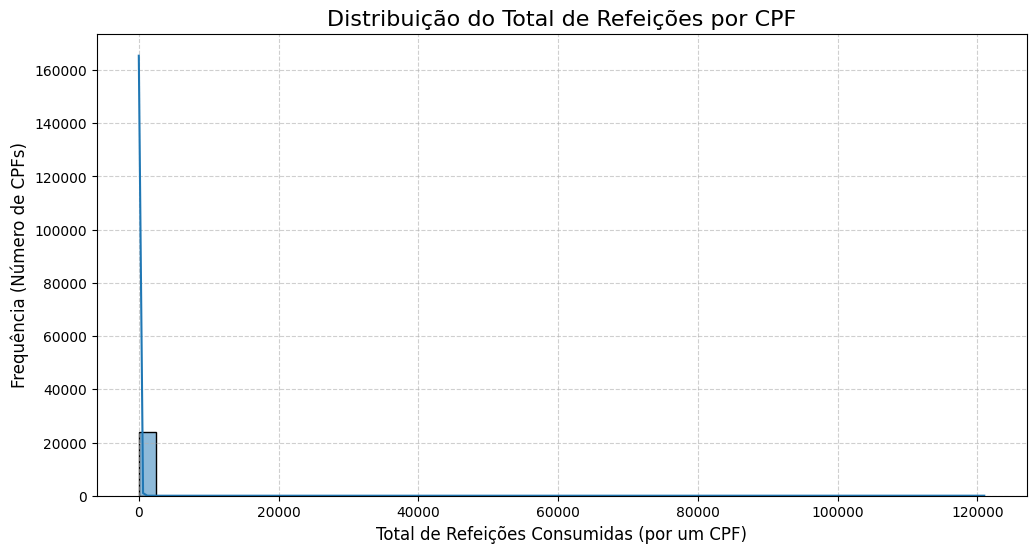

In [20]:
refeicoes_por_cpf = df.groupby('cpf_cnpj')['quantidade_refeicao'].sum()

print("Amostra dos dados agregados por CPF:")
print(refeicoes_por_cpf.head())

plt.figure(figsize=(12, 6))
sns.histplot(refeicoes_por_cpf, kde=True, bins=50)
plt.title('Distribuição do Total de Refeições por CPF', fontsize=16)
plt.xlabel('Total de Refeições Consumidas (por um CPF)', fontsize=12)
plt.ylabel('Frequência (Número de CPFs)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


O codigo acima, realiza o plot de histograma usando a distribuição do total de refeições por cpf. Para a essa realização, o codigo cria um pequeno dataset com base no dataset original, chamado de "refeicoes_por_cpf" onde temos a cada linha um unico cpf com a soma de suas refeições.

Em relação ao grafico, como esperado, a uma grande concentração nos valores menores e os poucos valores com um número amior de refeições.
Possivelmente sendo causada por um valor extremamente grande, que tem como consequência, "puxa" o histograma para longe, vamos verificar isso na proxima célula de codigos.

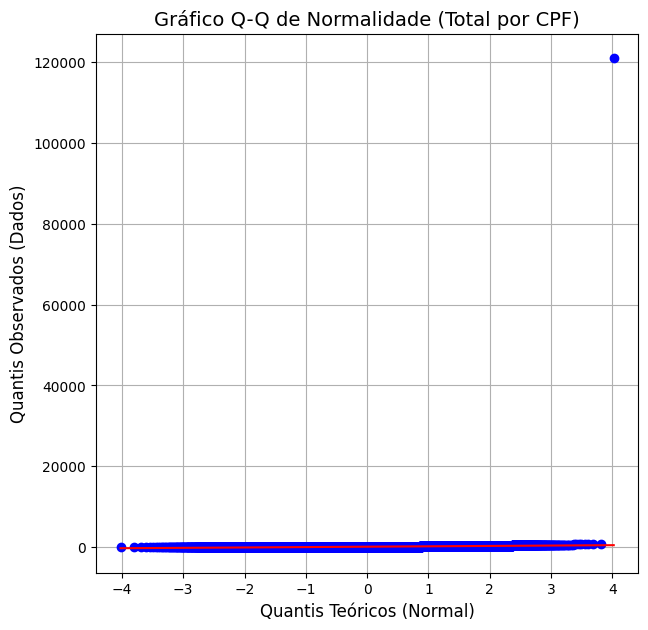

In [21]:

plt.figure(figsize=(7, 7))
stats.probplot(refeicoes_por_cpf, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Normalidade (Total por CPF)', fontsize=14)
plt.xlabel('Quantis Teóricos (Normal)', fontsize=12)
plt.ylabel('Quantis Observados (Dados)', fontsize=12)
plt.grid(True)
plt.show()

Nessa celula fazemos um plot para verificar a normalidade da nossa distribuição. porem como visto, e deduzido na célula anterior, existe um número que está atrapalhando a visualização do nosso histograma.

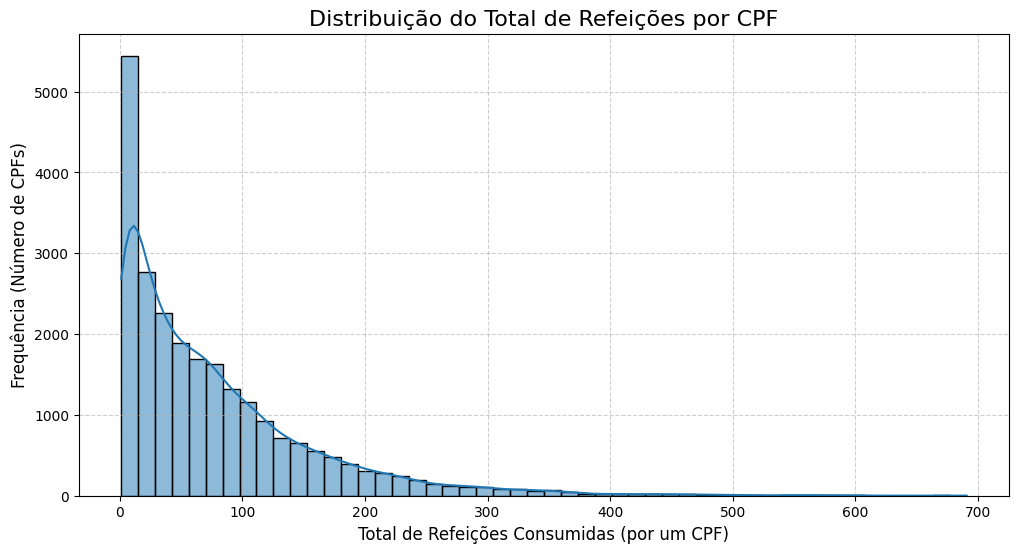

In [22]:
max_valor = refeicoes_por_cpf.max()
cpf_outlier = refeicoes_por_cpf.idxmax()
#print(f"O cpf:{cpf_outlier}, contem {max_valor} refeições")

df_sem_cpf_outlier = df[df['cpf_cnpj'] != cpf_outlier]
cpfs_sem_cpf_outlier = df_sem_cpf_outlier.groupby('cpf_cnpj')['quantidade_refeicao'].sum()


plt.figure(figsize=(12, 6))
sns.histplot(cpfs_sem_cpf_outlier, kde=True, bins=50)
plt.title('Distribuição do Total de Refeições por CPF', fontsize=16)
plt.xlabel('Total de Refeições Consumidas (por um CPF)', fontsize=12)
plt.ylabel('Frequência (Número de CPFs)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Procuramos e encontramos o valor extraordinario em nosso dataset, e removemos ele do dataset para novamente fazer o plot do histograma, como esperado, o histograma está com uma visualização mais precisa.

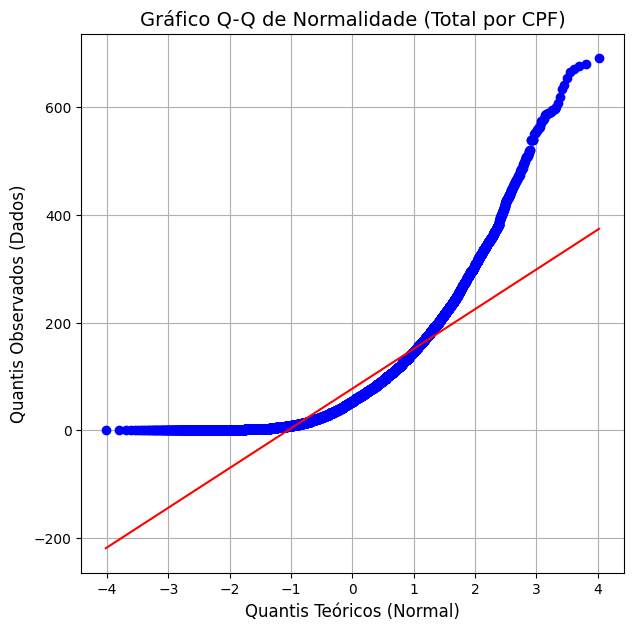

In [23]:
plt.figure(figsize=(7, 7))
stats.probplot(cpfs_sem_cpf_outlier, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Normalidade (Total por CPF)', fontsize=14)
plt.xlabel('Quantis Teóricos (Normal)', fontsize=12)
plt.ylabel('Quantis Observados (Dados)', fontsize=12)
plt.grid(True)
plt.show()

Agora, com o dataset sem o cpf_outlier, conseguimos verificar a normalidade da distribuição e concluir que ela não é normal, o que é normal para problemas sobre consumo.

#**QUESTÃO 3**

Elabore o cálculo a probabilidade de uma pessoa na fila do RU na hora do almoço
ser um não-pagante.

In [24]:
df_almoco = df[df['tipo_refeicao'] == 'Almoço']

contagem_acesso_almoco_verificacao = df_almoco['categoria_acesso'].groupby(df_almoco['vinculo_comensal']).value_counts()
print("--" *50)
print(contagem_acesso_almoco_verificacao)
print("--" *50)

contagem_acesso_almoco = df_almoco['categoria_acesso'].value_counts()
print("--" *50)
print(contagem_acesso_almoco)
print("--" *50)
total_nao_pagantes = contagem_acesso_almoco.get('NÃO PAGANTE')
total_transacoes_almoco = contagem_acesso_almoco.sum()

prob = total_nao_pagantes / total_transacoes_almoco
prob_percentual = prob * 100

print("--" *50)
print(f"Total de Transações no Almoço: {total_transacoes_almoco}")
print(f"Total de 'Não-Pagantes' no Almoço: {total_nao_pagantes}")
print("\n" + "="*40)
print(f"A probabilidade de uma pessoa na fila ser 'Não-Pagante' é:")
print(f"  {prob:.4f} (ou {prob_percentual:.2f}%)")

----------------------------------------------------------------------------------------------------
vinculo_comensal        categoria_acesso
AUTORIZADO              CARTÃO MESTRE           8
AUXILIO_CONCLUDENTE     NÃO PAGANTE            20
AUXILIO_MORADIA         NÃO PAGANTE          1147
DISCENTE                PAGANTE             20584
                        NÃO PAGANTE             1
DOCENTE                 PAGANTE               154
                        NÃO PAGANTE             1
ISENCAO_INGRESSANTE     NÃO PAGANTE          1276
                        PAGANTE                51
ISENCAO_PARCIAL         NÃO PAGANTE          3073
ISENCAO_TOTAL           NÃO PAGANTE           918
PARTICIPANTE_GRATUITO   CARTÃO MESTRE           1
PARTICIPANTE_PAGANTE    CARTÃO MESTRE           1
PROINTER                NÃO PAGANTE            51
RESIDENTE               NÃO PAGANTE           428
TECNICO_ADMINISTRATIVO  PAGANTE               245
                        NÃO PAGANTE             1
TERCEIRI

Para resolver a questão, criamos um pequeno dataset, ultilizando o original, criamos um dataset chamado de "df_almoco", apos definir esse dataset, fazemos uma contagem de acessos, com base nas categorias de acesso, e vinculo comercial para verificar se existe algum "NÃO PAGANTE" que não seja aluno, visto que não existe, nesse caso, fazemos outra contagem, dessa vez pegando apenas as categorias de acesso, que no caso seria:

1. Pagantes
2. Não pagantes
3. Cartão Mestre

Isso nos ajuda a coletar o total de não pagantes mais facilmente
apartir disso podemos calcular a propabilidade, que sera o total de alunos não pagantes. por fim mostramos o resultado que conseguimos

#**QUESTÃO 4**

Elabore o cálculo a probabilidade de um docente que almoçou alguma vez também
ter jantado.


---



In [25]:
df_docentes = df[df['vinculo_comensal'] == 'DOCENTE']

docentes_almocaram = df_docentes[df_docentes['tipo_refeicao'] == 'Almoço']['cpf_cnpj'].unique()
set_docentes_almocaram = set(docentes_almocaram)
total_docentes_almocaram = len(set_docentes_almocaram)

docentes_jantaram = df_docentes[df_docentes['tipo_refeicao'] == 'Jantar']['cpf_cnpj'].unique()
set_docentes_jantaram = set(docentes_jantaram)

set_almocaram_E_jantaram = set_docentes_almocaram.intersection(set_docentes_jantaram)
total_almocaram_E_jantaram = len(set_almocaram_E_jantaram)

prob = total_almocaram_E_jantaram / total_docentes_almocaram
prob_percentual = prob * 100

print(f"Total de docentes únicos que almoçaram: {total_docentes_almocaram}")
print(f"Total de docentes que almoçaram E jantaram: {total_almocaram_E_jantaram}")
print("\n" + "-"*50)
print(f"A probabilidade de um docente que almoçou também ter jantado é:")
print(f"  {prob:.4f} (ou {prob_percentual:.2f}%)")
print("-"*50)

Total de docentes únicos que almoçaram: 155
Total de docentes que almoçaram E jantaram: 31

--------------------------------------------------
A probabilidade de um docente que almoçou também ter jantado é:
  0.2000 (ou 20.00%)
--------------------------------------------------


Assim como a questão passada definimos um dataset, porem pegamos somente os cpfs que tem "vinculo_comensal" == 'Docente', ou seja, separamos em um dataset os docentes.

Após criamos um uma variavel que contem todos os CPFs dos docentes que almoçaram, e para falicitar mais para frente, criamos um set que contem esses CPFs. Depois conseguimos usar o metodo "len" para conseguir a quantidade de docentes.
De maneira semelhante, fizemos o mesmo para os CPFs que jantaram. Com os dois set em mão, ultilizamos o metodo "intersection" para criar um set geral, que vai conter os CPFs que almoçou e jantou.

Com essas variaveis, podemos concluir o calculo da probabilidade, pegamos a quantidade de CPFs que tem no "set_docentes_almocou_E_Jantou" e dividimos pela a quantidade de CPFs do "set_docentes_almocaram".